# An Interesting Dice Game - Optimal Strategy 🎲🎲

This notebook is inspired by a question I received in an interview for [unnamed firm]. The interviewer described a dice game, and asked what strategy I would employ to maximize my own expected profits.

#### The Game:

3 players are rolling 50 sided dice. You, as the 4th player, may select any number $x$ between 1 and 50. Once all players numbers are determined, the highest and lowest numbers are grouped together, and the middle two numbers are grouped together. each of these teams sums their numbers, and the team with the higher total pays the team with the lower total the difference of their sums in dollars.

#### Example Games:

$$
\begin{aligned}
&\begin{array}{ccccc}
\hline \hline \text { Game } & \text { Player 1 } & \text { Player 2 } & \text { Player 3 } & \text { You (x) }\\
\hline 1 & 48 & 13 & 23 & 10 \\
2 & 3 & 28 & 26 & 30\\
3 & 14 & 25 & 41 & 50  \\
\hline
\end{array}
\end{aligned}
$$

In game one, the payout is resolved as follows:
        
   $\textit{Team 1}: 48 + 10 =  58 $
   
   $\textit{Team 2}: 13 + 23 =  36 $
   
   $\textit{Outcome}: \frac{58 - 36}{2} \rightarrow \textit{You lose  \$11}$
   
We can similarly find the payout for games 2 and 3 as $ (+ \$10.5) $ and $ (+ \$0.5) $

#### The Question:

What is the optimal $x$ to maximize your profit? Is there an optimal $x$ at all?

#### The Thought Process:

This question was completely out of the blue for me, so it took me a while to properly understand the game and the nuances of the payoff. I drew a diagram of the payoff for certain fixed values of dice rolls.

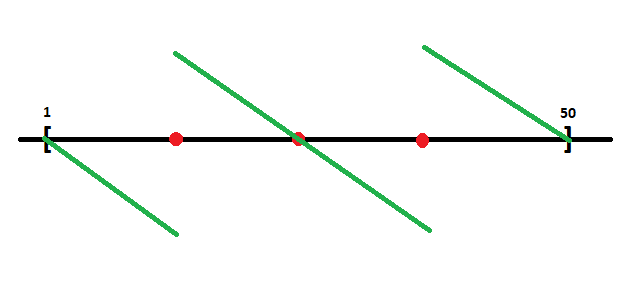

From the diagram, we can see 4 regions of payoffs. There are clear discontinuities once $x$ crosses the boundary of the lowest and highest rolls. From this initial rough analysis, I identified two situations that we'd like to encounter:

 1. We want to be a low number, but not the lowest.
 2. We want to be the highest number, but only marginally.
 
At this point, I had some intuition of the games payoff and what situations are beneficial and so began to construct a more rigorous analytic approach. Recall that the expected value of a game is the value of each of the outcomes, multiplied by the probability of those outcomes from occuring. It wasn't quite possible (for me) to apply this directly yet, but we know that for each value of x, we have 4 possible scenarios:

 1. x is the lowest value
 2. x is the second lowest value
 3. x is the second highest value
 4. x is the highest value
 
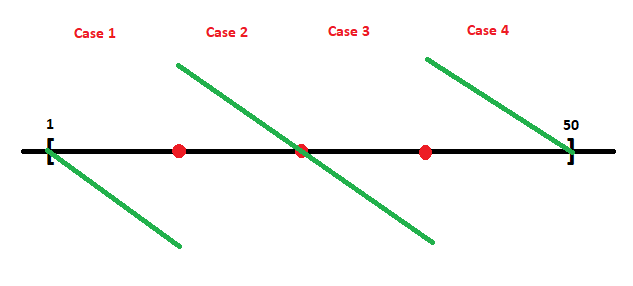

Herein lies the crux of my argument: Since fair die rolls are uniformly distributed, we can find the probability of each of these scenarios, as well as the expected values for each of these scenarios, given the expected position of the dice rolls. For Example, let's say we're looking at a value $x = 20$. The expected value of this $x$ value will be the sum of its expected values conditioned on each of the 4 scenarios described above. Let's say we are looking at just the first case ie. $x = 20$ is the lowest value. Then we can place our low, medium and high rolls in their expected positions given this particular scenario.

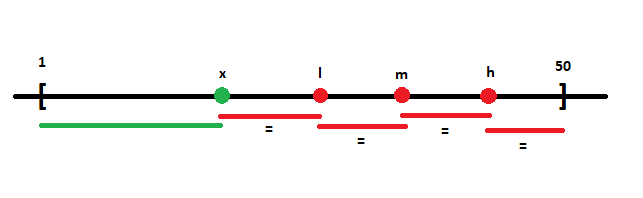

We can use these expected positions to get an expected payout, and we can multiply this by the probability of $ x = 20 $ being the lowest value to get the contribution of case 1 to the overall expected value of $ x = 20 $. Notice that in this case, the expected value of our chosen number x will be 0, due to the symmetry of the expected distribution of points. Think about the diagram. Our $20$ will be grouped with $(20 + 3(\frac{30}{4}))$ and the two middle values will be $(20 + (\frac{30}{4}))$ and $(20 + 2(\frac{30}{4}))$. These sums will be equal, giving an expect payout of zero. The same reasoning can be applied to case 4.

Now what remains is to apply this method for case 2 and 3, and we will get a formula for the expected value of this game in terms of $x$!

Now, at this point, we realize that working with a 50 sided die will involve many lengthy multiplications. In fact, it would be much easier to solve for a uniform distribution over [0,1] and use our solution to generalize to our 50 sided dice. From here on, let's work with this distribution instead.

 #### Case 2: x is the second smallest number

Probability of occuring:

$$p = x(1-x)^2$$

$$ = x^3 - 2x^2 + x$$

Expected positions of $l,m,h$:

$$l = \frac{x}{2}$$

$$m = \frac{2x+1}{3}$$

$$h = \frac{x+2}{3}$$

Payout:

$$(h+l) - (m+x)$$

$$= (\frac{x+2}{3} + \frac{x}{2}) - (\frac{2x+1}{3} + x)$$

$$= \frac{1}{3} - \frac{5x}{6}$$

Expected value of x, given that we're in case 2:

$$E_2 = (x^3 - 2x^2 + x)(\frac{1}{3} - \frac{5x}{6})$$

$$ = \frac{1}{6} (-5x^4 + 12x^3 - 9x^2 + 2x)$$

 #### Case 3: x is the second largest number
 
Probability of occuring:

$$p = x^2(1-x)$$

$$ = x^2 - x^3$$

Expected positions of $l,m,h$:

$$l = \frac{x}{3}$$

$$m = \frac{2x}{3}$$

$$h = \frac{x+1}{2}$$

Payout:

$$(h+l) - (m+x)$$

$$= (\frac{x+1}{2} + \frac{x}{3}) - (\frac{2x}{3} + x)$$

$$= \frac{3 - 5x}{6}$$

Expected value of x, given that we're in case 3:

$$E_3 = (x^2 - x^3)(\frac{3 - 5x}{6})$$

$$ = \frac{1}{6} (5x^4 - 8x^2 + 3x^2)$$

#### Law of Total Expectations:

$$E = E_1 + E_2 + E_3 + E_4$$

$$ = 0 + (\frac{1}{6} (-5x^4 + 12x^3 - 9x^2 + 2x)) + (\frac{1}{6} (5x^4 - 8x^2 + 3x^2)) + 0$$

$$ = \frac{1}{6}(4x^3 - 6x^2 + 2x )$$

So we have finally achieved our desired equation for the expected value. Now to find the maximum x, we can simply use the method that we would use for any cubic equation!

$$\frac{dE}{dx} = \frac{1}{6}(12x^2 - 12x + 2) = 0$$

applying the quadratic formula gives us roots at $x = \frac{1}{2} \pm \frac{1}{2\sqrt{3}}$

As can be seen in our graph below, the maximum is achieved at $x = \frac{1}{2} - \frac{1}{2\sqrt{3}}$ which is approximately $0.21$.

In [2]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

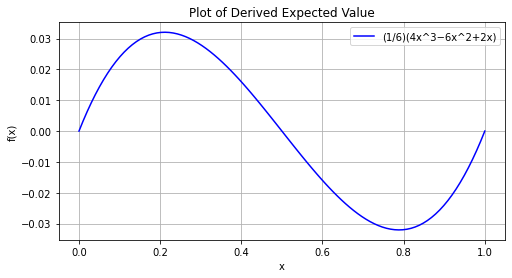

In [4]:
def E(x):
    return (1/6) * (4 * x**3 - 6 * x**2 + 2 * x)

# Generate x values from 0 to 1
x = np.linspace(0, 1, 100)  # 100 points between 0 and 1

plt.figure(figsize=(8, 4))
plt.plot(x, E(x), label='(1/6)(4x^3−6x^2+2x)', color='blue')
plt.title('Plot of Derived Expected Value')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


# Our Final Answer

Dragging this all the way back to the original question, for 3 n sided dice, we would select a number x which is closest to n(0.21). in the case where n=50, this would be 11.

$$
x=11
$$

We can validate this answer computationally, by running a Monte Carlo simulation of the game. The answer comes out very close to our approximation!

In [5]:
def dice_roll(d_sides, d_num):
    """
    Simulates the dice rolls given the parameters
    d_sides: number of sides on a single die
    d_num: how many dice to roll
    """
    roll = []
    for d in range(d_num):
        roll.append(np.random.randint(1,d_sides+1))
    return roll


def game(d_sides, d_num, x):
    """
    Simulates one round of the game described in a Jane Street Q
    d_sides: number of sides on a single die
    d_num: how many dice to roll
    x: number chosen by the player
    """  
    r = dice_roll(50,3)
    r.sort()

    h = r[2]
    m = r[1]
    l = r[0]

    if x>h:
        team_1 = x+l
        team_2 = h+m
    elif (x<=h) & (x>l):
        team_1 = x+m
        team_2 = h+l
    elif x<=l:
        team_1 = x+h
        team_2 = l+m

    payout = 0.5 * (team_2 - team_1)    
    return payout

def sim(d_sides, d_num, x, M):
    """
    Runs a monte carlo sim of the game above M times.
    """
    
    payout_arr = []
    
    for _ in range(M):
        p = game(d_sides, d_num, x)
        payout_arr.append(p)
    
    return np.mean(payout_arr)
        
    

In [6]:
graph_arr = []
for x in range(1,51):
    s = sim(d_sides=50, d_num=3, x=x, M=100000)
    graph_arr.append(s)

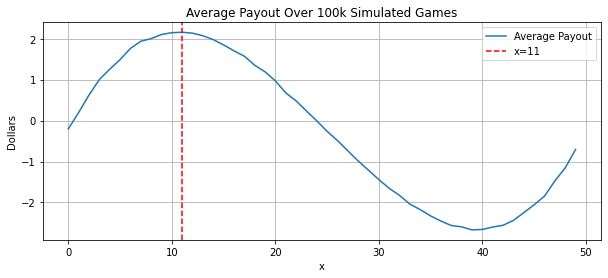

In [7]:
plt.figure(figsize = (10,4))
plt.plot(graph_arr, label='Average Payout')
plt.title('Average Payout Over 100k Simulated Games')
plt.xlabel('x')
plt.ylabel('Dollars')
plt.axvline(x=11, color='red', linestyle='--', label='x=11')
plt.grid(True)
plt.legend()

plt.show()

# Thank you!

I hope you found this notebook interesting.

RudySchneeweiss